## Image classification Practical

Question 1: how many classes are in cifar-10?

Answer: 10 
***
Question 2: is this a colour or greyscale image dataset?

Answer: Colour
***
Question 3: how many channels/depth should the images have?

Answer: 3
***
Question 4: is this a regression or classification problem?

Answer: classification
***
Question 5: if we one-hot encode the targets for this dataset, what will the dimensions of the resulting vector be?

Answer: For test data we have 10 000 by 10, for train data 50 000 by 10.
***
Question 6: which activation function will you most likely use in the last layer of your model for this problem?

Answer: Soft-max
***

**We Import libraries  to carry some capabilities**






In [32]:
from tensorflow.keras.models import Sequential   
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
np.random.seed(20)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import metrics
from keras.datasets import cifar10
%matplotlib inline

**Load data**

In [33]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

**Check shape**

In [34]:
print('Testing data shape : ', X_test.shape, Y_test.shape)

Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [35]:
print('Training data shape : ', X_train.shape, Y_train.shape)

Training data shape :  (50000, 32, 32, 3) (50000, 1)


**Find unique values from train data**





In [36]:
classes = np.unique(Y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


**Plots**

Text(0.5, 1.0, 'Ground Truth : [1]')

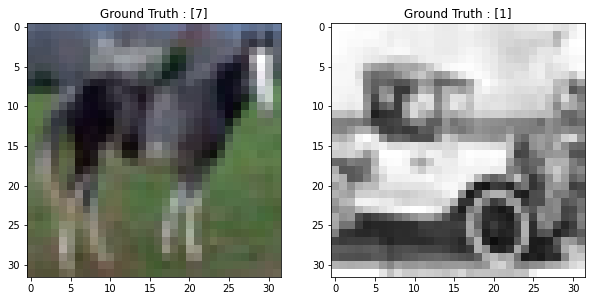

In [37]:
data_point = 37

plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[data_point,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_train[data_point]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[data_point,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_test[data_point]))

In [38]:
np.max(X_train[0]) # maximum for image

255

In [39]:
np.min(X_train[0]) # minimun for image

0

**Normalize**

In [40]:
X_train = X_train / 255
X_test = X_test / 255

In [41]:
np.max(X_train[0]) # check max. of image again

1.0

**One hot coding**

In [42]:
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)
num_classes = 10

In [43]:
Y_test.shape

(10000, 10)

In [44]:
Y_train.shape

(50000, 10)

**Split data into train, validation and test**

In [45]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3)

**convolutional neural network model**

In [46]:
def baseline_model():
    # create model
    model = Sequential()
    
    model.add(Conv2D(filters=90, kernel_size=2, activation='relu', input_shape=(32,32,3))) 
    
    # Here we create a 2x2 max pooling layer
    model.add(MaxPool2D(pool_size=2))

    model.add(Conv2D(filters=80, kernel_size=2, padding='same', activation='relu')) 
    model.add(MaxPool2D(pool_size=2))
    model.add(Conv2D(filters=100, kernel_size=2, padding='same', activation='relu')) 
    model.add(MaxPool2D(pool_size=2))
    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))

    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='softmax'))

    loss = CategoricalCrossentropy()
    
    # Compile the model
    model.compile(loss=loss,
             optimizer='adam',
             metrics=['accuracy'])
    return model

In [47]:
model = baseline_model()

In [48]:
model.summary() # show trainable parameters

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 31, 31, 90)        1170      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 90)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 15, 15, 80)        28880     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 80)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 100)         32100     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 3, 3, 100)       

In [49]:
checkpoint_path = "training/cp-{epoch:04d}.ckpt"

cp_callback = ModelCheckpoint(filepath=checkpoint_path, 
                              save_best_only=True, 
                              save_weights_only=True, 
                              verbose=1)

**Train the model**

In [50]:
history=model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=128, verbose=1, callbacks=[cp_callback])

Epoch 1/10
272/274 [============================>.] - ETA: 0s - loss: 1.7348 - accuracy: 0.3556
Epoch 00001: val_loss improved from inf to 1.39860, saving model to training/cp-0001.ckpt
274/274 [==============================] - 9s 31ms/step - loss: 1.7331 - accuracy: 0.3564 - val_loss: 1.3986 - val_accuracy: 0.4915
Epoch 2/10
274/274 [==============================] - ETA: 0s - loss: 1.3576 - accuracy: 0.5089
Epoch 00002: val_loss improved from 1.39860 to 1.26524, saving model to training/cp-0002.ckpt
274/274 [==============================] - 8s 28ms/step - loss: 1.3576 - accuracy: 0.5089 - val_loss: 1.2652 - val_accuracy: 0.5540
Epoch 3/10
274/274 [==============================] - ETA: 0s - loss: 1.1882 - accuracy: 0.5753
Epoch 00003: val_loss improved from 1.26524 to 1.11835, saving model to training/cp-0003.ckpt
274/274 [==============================] - 8s 28ms/step - loss: 1.1882 - accuracy: 0.5753 - val_loss: 1.1183 - val_accuracy: 0.6105
Epoch 4/10
272/274 [==================

In [51]:
correct_values = np.argmax(Y_test,axis=1)

**Plot of train and validation**

In [52]:
def plot_hist(h, xsize=6, ysize=10):

    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True)
    
    # summarize history for Accuracy
    plt.subplot(211)
    plt.plot(h['accuracy'])
    plt.plot(h['val_accuracy'])
    plt.title('Training Performance')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='best')
    
    plt.draw()
    plt.show()

    return

**Plot of accuracy over epochs (showing results of training performance)**

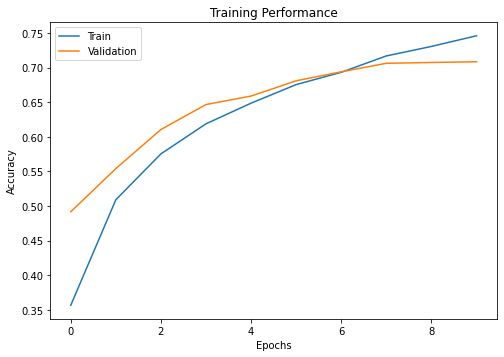

In [53]:
plot_hist(history.history, xsize=8, ysize=12)

**Calculating accuracy**

In [54]:
model = baseline_model()

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=-1)

accuracy_score(predictions,correct_values)*100

10.059999999999999

In [55]:
model = baseline_model()
model.load_weights("training/cp-0010.ckpt")

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=-1)

accuracy_score(predictions,correct_values)*100   #percentage above 70 

70.11

**Model prediction**

In [56]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=-1)

**Confusion matrix**

In [57]:
confusion_matrix(predictions,correct_values)

array([[764,  37,  55,  18,  25,  14,   4,  21,  55,  42],
       [  9, 796,   3,   8,   4,   3,   1,   1,  26,  90],
       [ 79,  14, 680, 118, 110, 121,  60,  82,  29,  12],
       [ 14,  11,  66, 608,  68, 311,  48,  63,  16,  27],
       [ 12,   4,  61,  53, 640,  51,  19,  89,   6,   6],
       [  2,   1,  28,  55,  14, 413,   3,  43,   2,   4],
       [ 15,  16,  72,  87,  95,  45, 858,  18,  12,  24],
       [  4,   2,  15,  22,  32,  28,   1, 662,   2,   6],
       [ 70,  32,  11,  19,  10,   9,   5,   4, 833,  32],
       [ 31,  87,   9,  12,   2,   5,   1,  17,  19, 757]])